In [1]:
#Data Preprocessing:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [5]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
df.shape

(3999, 12)

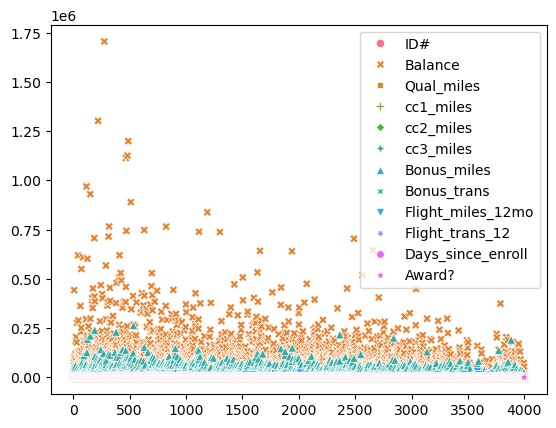

In [7]:
sns.scatterplot(data=df)
plt.show()

In [8]:
# identify null values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

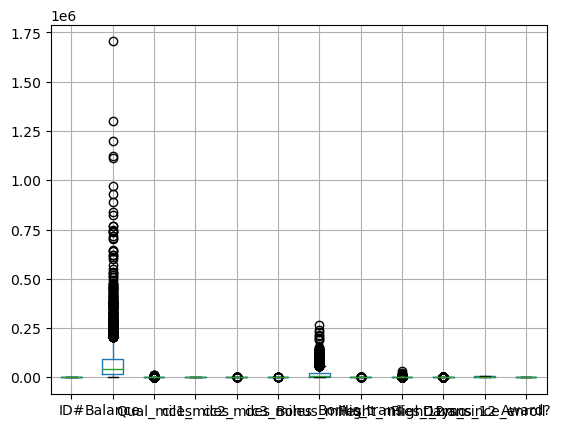

In [9]:
# identify outliers
df.boxplot()
plt.show()

In [10]:
Q1=df['Balance'].quantile(0.25)
Q3=df['Balance'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

18527.5 92404.0 73876.5


In [11]:
lower_extreme=Q1-1.5*IQR
upper_extreme=Q3+1.5*IQR
print(lower_extreme,upper_extreme)

-92287.25 203218.75


In [12]:
df=df[(df['Balance']<lower_extreme) | (df['Balance']>upper_extreme)]
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0
32,33,276571,0,4,1,1,42044,23,0,0,7872,0
43,44,619393,0,3,1,1,15008,14,0,0,7819,1
45,46,288865,967,1,1,1,23600,14,2000,4,6884,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,3777,221543,0,1,1,1,10300,5,200,3,3554,1
3756,3779,203353,0,1,1,1,14000,13,4000,8,3557,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1


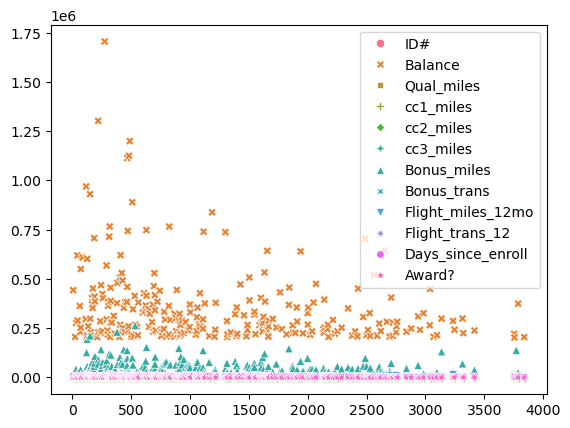

In [13]:
## After removal of outliers
sns.scatterplot(data=df)
plt.show()

In [150]:
df.drop(columns='ID#',inplace=True)

In [151]:
#df.dropna(inplace=True)

In [152]:
#split the data into target and feature

In [153]:
target=df[['Award?']]
target

,Award?
8,1
24,0
32,0
43,1
45,1
...,...
3754,1
3756,1
3772,1
3788,1


In [154]:
features=df.drop(columns='Award?')
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,0
24,205651,500,1,1,1,4025,21,700,4,7932,0
32,276571,0,4,1,1,42044,23,0,0,7872,0
43,619393,0,3,1,1,15008,14,0,0,7819,1
45,288865,967,1,1,1,23600,14,2000,4,6884,0
...,...,...,...,...,...,...,...,...,...,...,...
3754,221543,0,1,1,1,10300,5,200,3,3554,0
3756,203353,0,1,1,1,14000,13,4000,8,3557,0
3772,822321,0,5,1,1,138334,26,600,2,3288,1
3788,374613,0,1,2,1,23592,31,5000,14,3463,0


In [155]:
# KMeans

In [156]:
from sklearn.cluster import KMeans

In [157]:
kmeans=KMeans(n_clusters=2)

In [158]:
cluster=kmeans.fit(features)
cluster.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [159]:
import numpy as np

In [160]:
np.unique(cluster.labels_)

array([0, 1])

In [161]:
df['clusters']=cluster.labels_

In [162]:
df[df.clusters==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
43,619393,0,3,1,1,15008,14,0,0,7819,1,0
87,609477,0,3,1,1,21422,22,1200,8,6820,0,0
117,969559,0,1,1,1,2500,3,1000,2,7718,1,0
126,602064,0,5,1,1,194753,26,2250,10,7652,1,0
151,930410,0,5,1,1,211284,18,2250,6,7640,1,0
186,707079,0,4,1,1,57173,40,3450,12,7523,1,0
220,1302051,2706,5,1,1,90653,32,3050,7,7467,1,0
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,0
290,568174,0,5,1,1,67121,16,1000,2,7243,1,0
313,714717,0,5,1,1,119162,20,1750,4,7183,1,0


In [163]:
df[df.clusters==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
24,205651,500,1,1,1,4025,21,700,4,7932,0,1
32,276571,0,4,1,1,42044,23,0,0,7872,0,1
45,288865,967,1,1,1,23600,14,2000,4,6884,1,1
63,362642,0,1,1,1,28079,8,0,0,6835,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3417,238446,1082,4,1,1,37766,28,1550,11,890,1,1
3754,221543,0,1,1,1,10300,5,200,3,3554,1,1
3756,203353,0,1,1,1,14000,13,4000,8,3557,1,1
3788,374613,0,1,2,1,23592,31,5000,14,3463,1,1


In [164]:
df[df.clusters==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters


In [165]:
df[df.clusters==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters


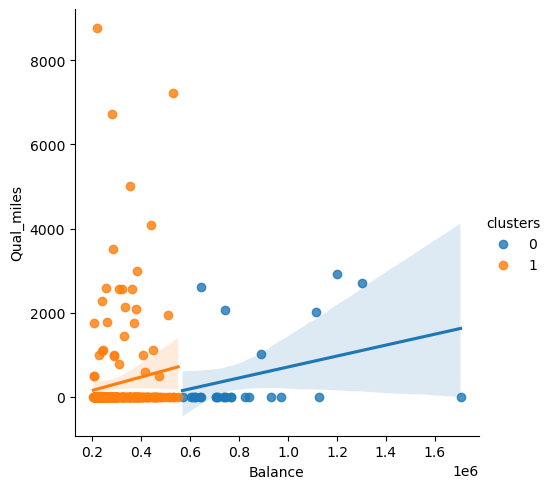

In [166]:
sns.lmplot(data=df, x='Balance', y='Qual_miles', hue='clusters')
plt.show()

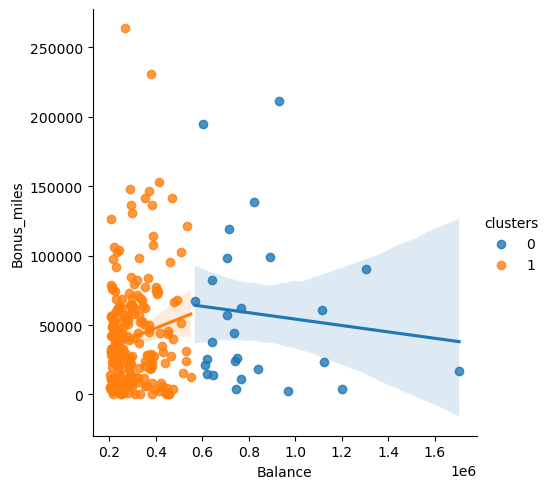

In [167]:
sns.lmplot(data=df, x='Balance', y='Bonus_miles', hue='clusters')
plt.show()

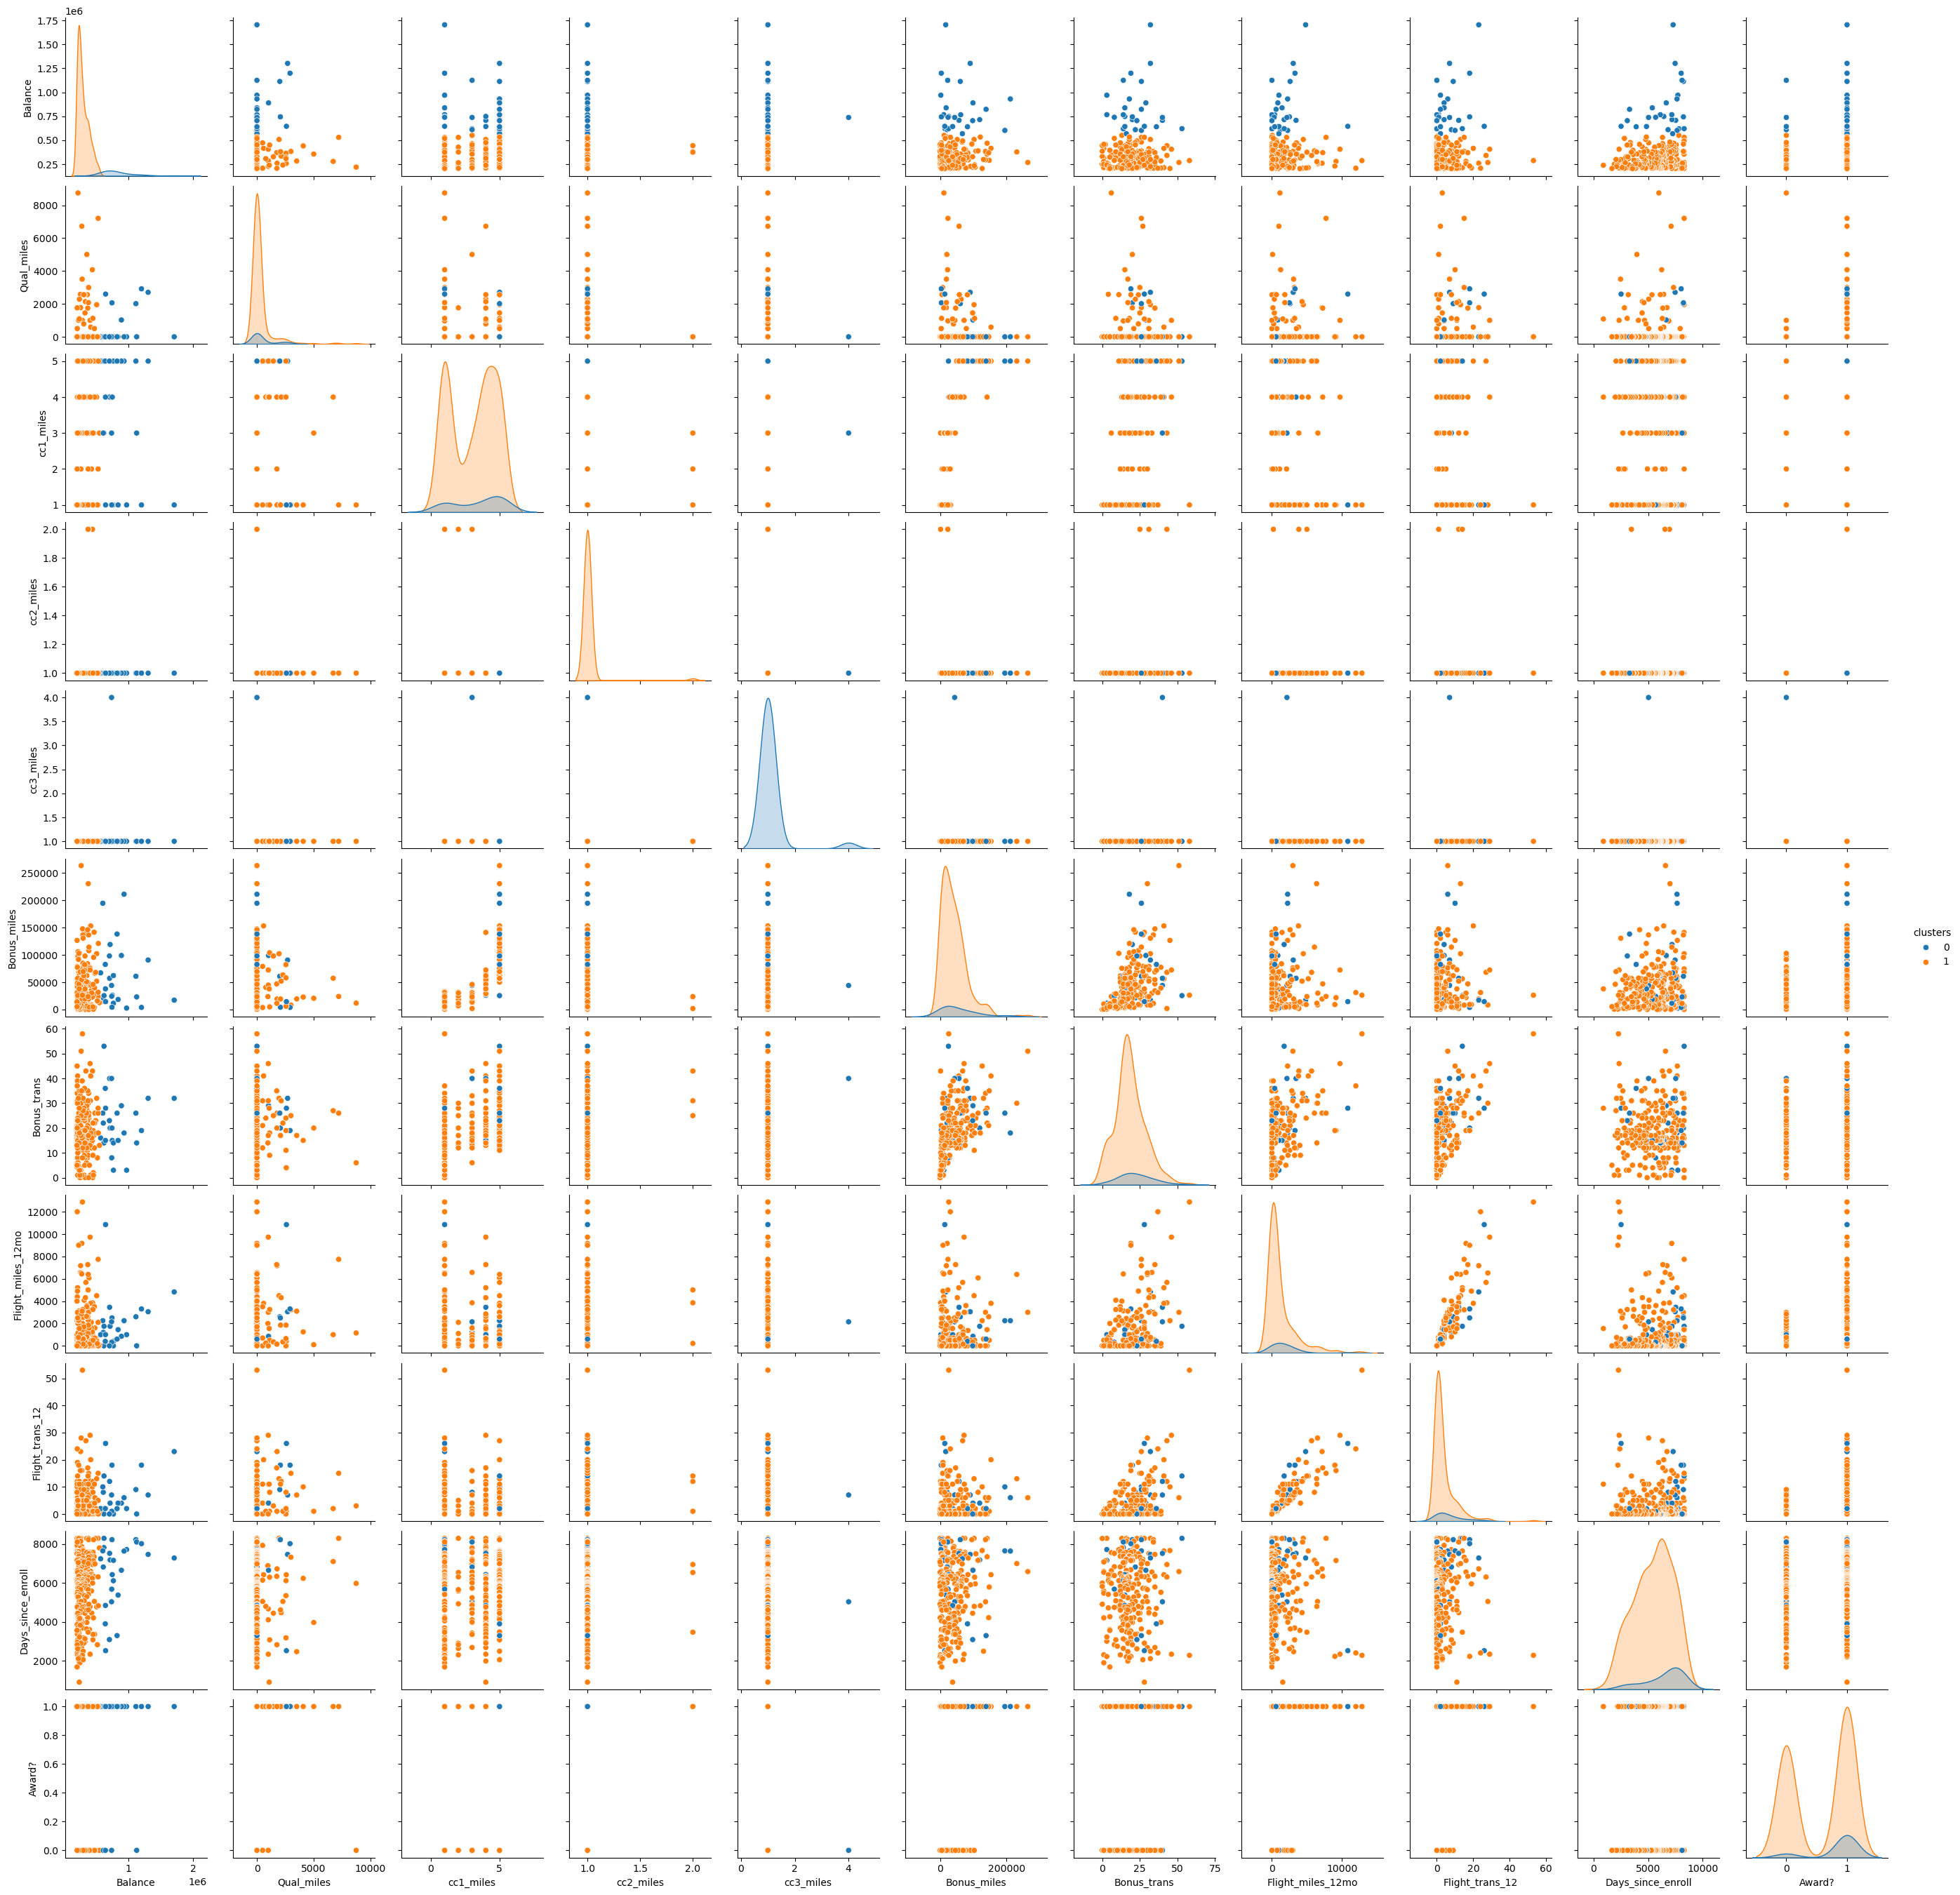

In [168]:
sns.pairplot(data=df, hue='clusters')

In [108]:
# Elbow method

clusters=range(1,11)
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

In [109]:
inertia

[10897000426137.96,
 3935305404873.8716,
 2418528625751.9175,
 1350079469459.768,
 1098005134169.3423,
 893306331677.2456,
 721925523238.9425,
 621729189544.475,
 519064414315.2566,
 456126166309.15393]

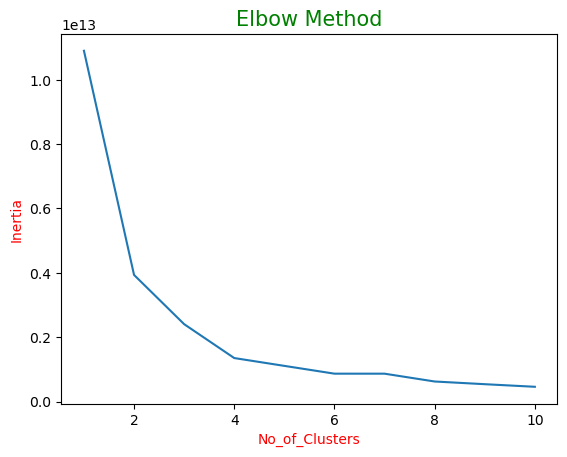

In [35]:
import matplotlib.pyplot as plt
plt.plot(clusters,inertia)
plt.xlabel('No_of_Clusters',size=10,color='red')
plt.ylabel('Inertia',size=10,color='red')
plt.title('Elbow Method',size=15,color='green')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(features,cluster.labels_)

0.7499069810265929

In [38]:
# Hierarchial Clustering

In [39]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

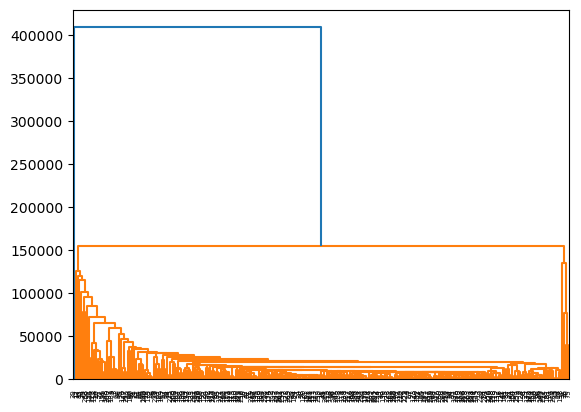

In [40]:
dendrogram=sch.dendrogram(sch.linkage(features,method='single'))

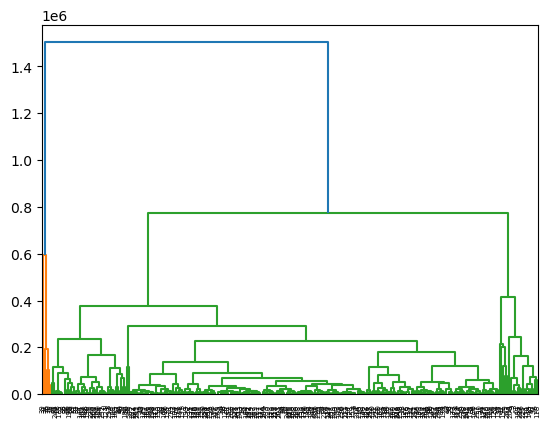

In [41]:
dendrogram=sch.dendrogram(sch.linkage(features,method='complete'))

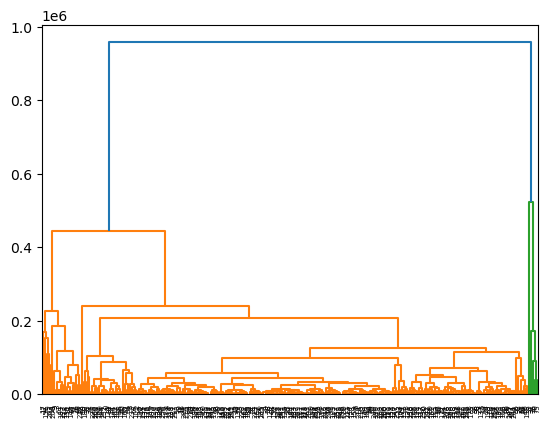

In [42]:
dendrogram=sch.dendrogram(sch.linkage(features,method='average'))

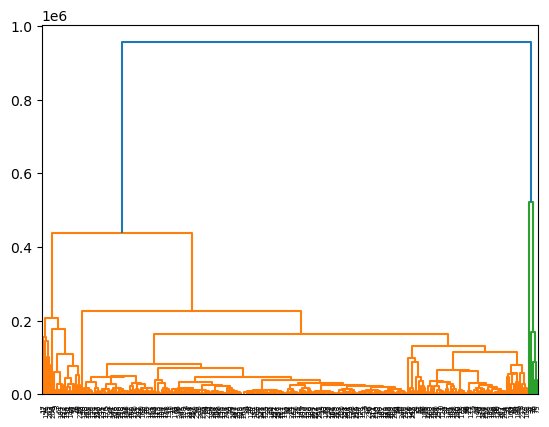

In [43]:
dendrogram= sch.dendrogram(sch.linkage(features,method='centroid'))

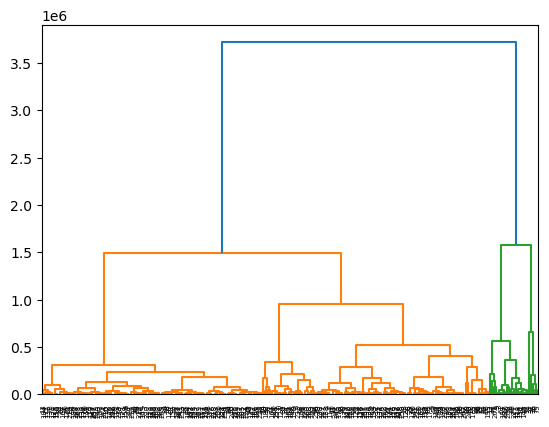

In [44]:
dendrogram= sch.dendrogram(sch.linkage(features,method='ward'))

In [45]:
agg=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [46]:
clusters=agg.fit(features)

In [47]:
clusters.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [48]:
silhouette_score(features,clusters.labels_)

0.7474673006401106

In [49]:
agg=AgglomerativeClustering(n_clusters=2,linkage='single')

In [50]:
clusters=agg.fit(features)

In [51]:
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [52]:
silhouette_score(features,clusters.labels_)

0.8432802632806127

In [53]:
agg=AgglomerativeClustering(n_clusters=2,linkage='complete')

In [54]:
clusters=agg.fit(features)

In [55]:
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [56]:
silhouette_score(features,clusters.labels_)

0.804604279621817

In [57]:
agg=AgglomerativeClustering(n_clusters=2,linkage='average')

In [58]:
clusters=agg.fit(features)

In [59]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [60]:
silhouette_score(features,clusters.labels_)

0.804604279621817

In [61]:

# DBSCAN

In [62]:
from sklearn.cluster import DBSCAN
import numpy as  np
from sklearn.preprocessing import StandardScaler

In [63]:
std_sca= StandardScaler()

In [64]:
df_new= pd.DataFrame(std_sca.fit_transform(df),columns=df.columns)
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-1.291851,0.464043,-0.306117,-0.048277,9.363048,-0.06143,-0.996366,2.350796,1.202343,1.242281,0.783712,0.813941,-0.329140
1,-1.275264,-0.733653,0.160594,-1.271291,-0.106803,-0.06143,-0.940993,0.204640,-0.271749,0.007543,1.337188,-1.228590,-0.329140
2,-1.266970,-0.375785,-0.306117,0.563230,-0.106803,-0.06143,-0.014399,0.399745,-0.599325,-0.609826,1.303440,-1.228590,-0.329140
3,-1.255567,1.354121,-0.306117,-0.048277,-0.106803,-0.06143,-0.673317,-0.478227,-0.599325,-0.609826,1.273629,0.813941,3.038218
4,-1.253493,-0.313749,0.596502,-1.271291,-0.106803,-0.06143,-0.463914,-0.478227,0.336606,0.007543,0.747713,0.813941,-0.329140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2.614381,-0.653461,-0.306117,-1.271291,-0.106803,-0.06143,-0.788060,-1.356200,-0.505732,-0.146799,-1.125334,0.813941,-0.329140
262,2.616454,-0.745249,-0.306117,-1.271291,-0.106803,-0.06143,-0.697884,-0.575780,1.272538,0.624912,-1.123646,0.813941,-0.329140
263,2.633041,2.378111,-0.306117,1.174737,-0.106803,-0.06143,2.332369,0.692403,-0.318546,-0.301142,-1.274952,0.813941,3.038218
264,2.649628,0.118942,-0.306117,-1.271291,9.363048,-0.06143,-0.464109,1.180166,1.740504,1.550966,-1.176519,0.813941,-0.329140


In [65]:
eps = [1,2,3,4,5,6,7]  
min_node =range(1,11)

In [66]:
output= []
for i in eps:
    for j in min_node:
        labels= DBSCAN(eps=i,min_samples=j).fit(df_new).labels_
        score= silhouette_score(df_new,labels)
        output.append([i,j,score])

In [67]:
labels

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [68]:
output

[[1, 1, -0.040892772781033405],
 [1, 2, -0.12098422780806466],
 [1, 3, -0.09402665024667077],
 [1, 4, -0.10676687680197777],
 [1, 5, -0.06980423304747556],
 [1, 6, -0.08267656349231399],
 [1, 7, -0.12518622032491172],
 [1, 8, -0.16339810681474684],
 [1, 9, -0.16603702238498574],
 [1, 10, -0.171867950695],
 [2, 1, 0.108318993678145],
 [2, 2, 0.1531532342436689],
 [2, 3, 0.14500441830040683],
 [2, 4, 0.13216316646094936],
 [2, 5, 0.13151876643055269],
 [2, 6, 0.1323683461958281],
 [2, 7, 0.12901113444898357],
 [2, 8, 0.12901113444898357],
 [2, 9, 0.12901113444898357],
 [2, 10, 0.12901113444898357],
 [3, 1, 0.32253520957001725],
 [3, 2, 0.32699791628738306],
 [3, 3, 0.3402950959917806],
 [3, 4, 0.34326839717354835],
 [3, 5, 0.33994276018811953],
 [3, 6, 0.33467757963050243],
 [3, 7, 0.33467757963050243],
 [3, 8, 0.3124080221118822],
 [3, 9, 0.2816616479380298],
 [3, 10, 0.2816616479380298],
 [4, 1, 0.4397563193254316],
 [4, 2, 0.5747042800203999],
 [4, 3, 0.5810491562691005],
 [4, 4, 0.58

In [69]:
score

0.6414055581238544

In [70]:
a=pd.DataFrame(output)
score=a.iloc[:,2].max()

In [71]:
score

0.6414055581238544

In [72]:
a[a[2]==score]

,0,1,2
43,5,4,0.641406
44,5,5,0.641406
45,5,6,0.641406
46,5,7,0.641406
47,5,8,0.641406
48,5,9,0.641406
49,5,10,0.641406
53,6,4,0.641406
54,6,5,0.641406
55,6,6,0.641406


In [73]:
labels=DBSCAN(eps=5,min_samples=6).fit(df_new).labels_
labels

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

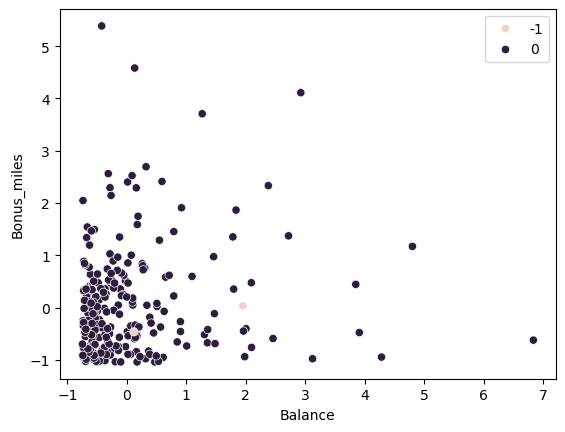

In [74]:
sns.scatterplot(data=df_new,x='Balance',y='Bonus_miles',hue=labels)

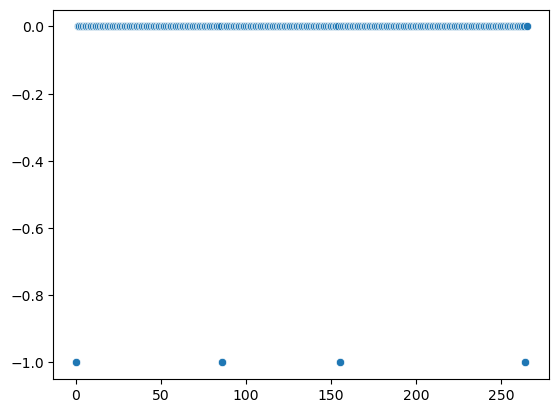

In [192]:
sns.scatterplot(data=labels)
plt.show()